# COMP5318 Assignment 2: Image Classification

#### Group number: 32  , SID1: 490560477 , SID2: 490532430  

This notebook includes the code to load the Fashion-MNIST dataset using Keras, and a skeleton for the main sections that should be included in the notebook. Please see the assignment specification for more detail. You may wish to add extra subsections where appropriate. 

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant.

*`We have exclusively referenced code from the lectures and replicated code from the tutorials four our assignment and would like to acknowledge help received from the tutorial sheets.`*

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
import pandas as pd

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

## 1. Data loading, preprocessing, and exploration
We have included the code to load the dataset below. Please proceed with your data exploration and preprocessing steps, including creating any relevant data subsets required. The documentation for the data loading function can be accessed [here](https://keras.io/api/datasets/fashion_mnist/).

In [ ]:
# Load the Fashion-MNIST dataset training and test sets as numpy arrays
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# An ordered list of the class names
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
              ]

## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

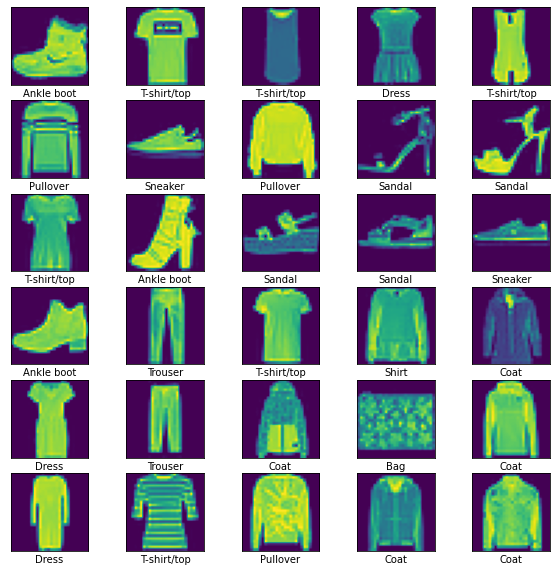

In [ ]:
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array((X_train/255)[i,:,:]).reshape(28,28))
    plt.xlabel(class_names[y_train[i]])

In [ ]:
X_train_orginal=X_train/255
X_test_original=X_test/255
y_test_original=y_test
y_train_original=y_train

In [ ]:
X_train=X_train[:30000]
y_train=y_train[:30000]
print(X_train.shape)

(30000, 28, 28)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_final=X_train.reshape(30000,784)
X_test_final=X_test.reshape(10000,784)

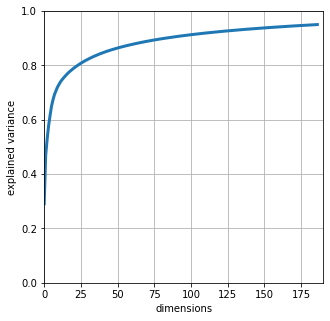

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_red = pca.fit_transform(X_train_final)
X_test_red = pca.transform(X_test_final)
a= np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize = (5,5))
plt.plot(a, linewidth=3)
plt.axis([0, 190, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
my_svm=SVC(random_state=0)

### Fully connected neural network

In [ ]:
def model1(activation_function="tanh",optimizer__lr=0.01):
    mymodel=keras.models.Sequential()
    mymodel.add(keras.layers.Dense(530,input_dim =784, activation=activation_function))
    mymodel.add(keras.layers.Dense(350, activation=activation_function))
    mymodel.add(keras.layers.Dense(10, activation="softmax"))
    mymodel.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=5e-2),metrics=['accuracy'])
    return mymodel   

### Convolutional neural network

In [ ]:
X_train_cnn = X_train.reshape(30000,28,28,1)
X_test_cnn  = X_test.reshape(10000,28,28,1)

In [ ]:
def model2(kernel_size=(3,3),strides=(1, 1),optimizer__lr=0.01):
    mymodel=keras.models.Sequential()
    mymodel.add(keras.layers.Conv2D(30, kernel_size=(3, 3), strides=(1, 1),activation="relu",input_shape=(28,28,1))),
    mymodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    mymodel.add(keras.layers.Conv2D(200, kernel_size=(3, 3), strides=(1, 1), activation="relu"))
    mymodel.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    mymodel.add(keras.layers.Flatten())
    mymodel.add(keras.layers.Dropout(0.5))
    mymodel.add(keras.layers.Dense(10, activation="softmax"))
    mymodel.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    return mymodel

## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10,100],'gamma': [0.01,0.1, 1],'kernel':['poly', 'rbf']}
grid_search = GridSearchCV(my_svm , param_grid , cv= 3,n_jobs=-1,verbose=2)
%time grid_search.fit(X_train_red, y_train)


print("Test set score: {:.2f}".format(grid_search.score(X_test_red, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
CPU times: user 36.6 s, sys: 2.37 s, total: 39 s
Wall time: 38min 46s
Test set score: 0.89
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.89
Best estimator:
SVC(C=10, gamma=0.01, random_state=0)


### Fully connected neural network

In [ ]:
from scikeras.wrappers import KerasClassifier
myclassifier= KerasClassifier(build_fn=model1,activation_function="relu",optimizer__lr=0.01)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "optimizer__lr": [0.1, 0.01, 0.001],
    "activation_function": ["relu", "sigmoid", "tanh"]
}

grid_search_cv = GridSearchCV(myclassifier, param_grid, cv=3,n_jobs=-1,verbose=2)
%time grid_search_cv.fit(X_train_final, y_train,epochs=10)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.6272 - accuracy: 0.7799
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4377 - accuracy: 0.8433
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3856 - accuracy: 0.8586
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3558 - accuracy: 0.8701
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3342 - accuracy: 0.8750
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3158 - accuracy: 0.8838
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3013 - accuracy: 0.8879
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2862 - accuracy: 0.8922
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2746 - accuracy: 0.8976
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2595 - accuracy: 0.9022

GridSearchCV(cv=3,
             estimator=KerasClassifier(activation_function='relu', build_fn=<function model1 at 0x7fd5022d4cb0>, optimizer__lr=0.01),
             n_jobs=-1,
             param_grid={'activation_function': ['relu', 'sigmoid', 'tanh'],
                         'optimizer__lr': [0.1, 0.01, 0.001]},
             verbose=2)

In [ ]:
print(grid_search_cv.best_params_)
best_model = grid_search_cv.best_estimator_.model

{'activation_function': 'relu', 'optimizer__lr': 0.1}


### Convolutional neural network

In [ ]:
from scikeras.wrappers import KerasClassifier
myclassifier1= KerasClassifier(build_fn=model2,kernel_size=(3, 3),strides=(1, 1),optimizer__lr=0.01)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "optimizer__lr": [0.1, 0.01, 0.001],
    "kernel_size":[(3, 3),(5,5)],
    "strides": [(1,1),(2,2)]    
        
}

grid_search_cv = GridSearchCV(myclassifier1, param_grid, cv=3, verbose=2,n_jobs=-1)
%time grid_search_cv.fit(X_train_cnn, y_train, epochs=10,batch_size=64)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6277 - accuracy: 0.7725
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8470
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3682 - accuracy: 0.8673
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8758
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3236 - accuracy: 0.8825
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2992 - accuracy: 0.8917
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2818 - accuracy: 0.8967
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2717 - accuracy: 0.9007
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2579 - accuracy: 0.9049
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2427 - accuracy: 0.9108

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function model2 at 0x7fd483ef73b0>, kernel_size=(3, 3), optimizer__lr=0.01, strides=(1, 1)),
             n_jobs=-1,
             param_grid={'kernel_size': [(3, 3), (5, 5)],
                         'optimizer__lr': [0.1, 0.01, 0.001],
                         'strides': [(1, 1), (2, 2)]},
             verbose=2)

In [ ]:
print(grid_search_cv.best_params_)
best_model = grid_search_cv.best_estimator_.model

{'kernel_size': (5, 5), 'optimizer__lr': 0.001, 'strides': (1, 1)}


## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

In [ ]:
new_svm=SVC(kernel="rbf",random_state=0,gamma=0.01,C=10)
X_train_model=X_train_orginal.reshape(60000,784)
X_test_model=X_test_original.reshape(10000,784)
pca=PCA(n_components=0.95)
X_train_svm = pca.fit_transform(X_train_model)
X_test_svm = pca.transform(X_test_model)
new_svm.fit(X_train_svm,y_train_original)
pred = new_svm.predict(X_test_svm)
s=accuracy_score(pred, y_test)
accuracy1=str(s)
pred2= new_svm.predict(X_train_svm)
e=accuracy_score(pred2,y_train_original)
print("Tranning accuracy "+str(e))
print("The accurracy score on test data for SVM with best hyperparameter combination is "+accuracy1)

Tranning accuracy 0.9524333333333334
The accurracy score on test data for SVM with best hyperparameter combination is 0.8996


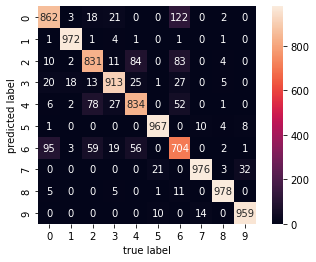

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test,pred)
sns.heatmap(matrix.T, square=True, annot=True,fmt="d")
plt.xlabel('true label')
plt.ylabel('predicted label');

### Fully connected neural network

In [ ]:
from sklearn.model_selection import train_test_split
X_train_mlp, X_valid_mlp, y_train_mlp, y_valid_mlp = train_test_split(X_train_model, y_train_original, train_size=0.9)

In [ ]:
mymodel=keras.models.Sequential()
mymodel.add(keras.layers.Dense(530,input_dim =784, activation="relu"))
mymodel.add(keras.layers.Dense(350, activation="relu"))
mymodel.add(keras.layers.Dense(10, activation="softmax"))
mymodel.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.1),metrics=['accuracy'])
history = mymodel.fit(X_train_mlp, y_train_mlp, epochs=15, validation_data=(X_valid_mlp, y_valid_mlp),batch_size=64)
loss, accuracy2 = mymodel.evaluate(X_test_model, y_test)
print("The accurracy score on test data for Neural network with best hyperparameter combination is "+str(accuracy2))

Epoch 1/15
844/844 [==============================] - 3s 4ms/step - loss: 0.5668 - accuracy: 0.7982 - val_loss: 0.4075 - val_accuracy: 0.8502
Epoch 2/15
844/844 [==============================] - 3s 4ms/step - loss: 0.4001 - accuracy: 0.8543 - val_loss: 0.3606 - val_accuracy: 0.8732
Epoch 3/15
844/844 [==============================] - 3s 4ms/step - loss: 0.3568 - accuracy: 0.8690 - val_loss: 0.3281 - val_accuracy: 0.8808
Epoch 4/15
844/844 [==============================] - 4s 4ms/step - loss: 0.3308 - accuracy: 0.8781 - val_loss: 0.3258 - val_accuracy: 0.8797
Epoch 5/15
844/844 [==============================] - 3s 4ms/step - loss: 0.3077 - accuracy: 0.8868 - val_loss: 0.3158 - val_accuracy: 0.8803
Epoch 6/15
844/844 [==============================] - 3s 4ms/step - loss: 0.2905 - accuracy: 0.8925 - val_loss: 0.3031 - val_accuracy: 0.8870
Epoch 7/15
844/844 [==============================] - 3s 4ms/step - loss: 0.2783 - accuracy: 0.8968 - val_loss: 0.2954 - val_accuracy: 0.8898
Epoch 

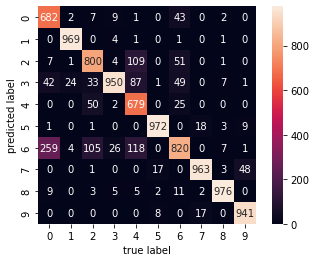

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_1=mymodel.predict(X_test_model).round(2)
y_pred = np.argmax(pred_1, axis=-1)
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix.T, square=True, annot=True,fmt="d")
plt.xlabel('true label')
plt.ylabel('predicted label');

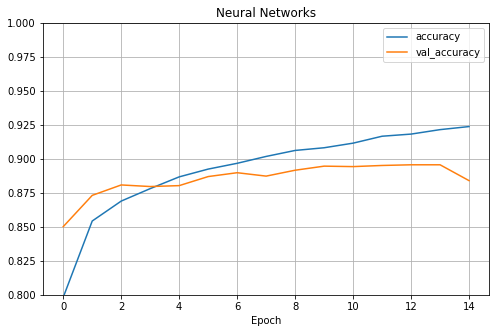

In [ ]:
nn = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
nn.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.title("Neural Networks")
plt.show()

### Convolutional neural network

In [ ]:
X_train_model_cnn= X_train_orginal.reshape(60000,28,28,1)
X_test_model_cnn=X_test_original.reshape(10000,28,28,1)
from sklearn.model_selection import train_test_split
X_train_cnn, X_valid_cnn, y_train_cnn, y_valid_cnn = train_test_split(X_train_model_cnn, y_train_original, train_size=0.9)

In [ ]:
mymodel1=keras.models.Sequential()
mymodel1.add(keras.layers.Conv2D(30, kernel_size=(5,5), strides=(1, 1),activation="relu",input_shape=(28,28,1))),
mymodel1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
mymodel1.add(keras.layers.Conv2D(200, kernel_size=(5, 5), strides=(1, 1), activation="relu"))
mymodel1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
mymodel1.add(keras.layers.Flatten())
mymodel1.add(keras.layers.Dropout(0.5))
mymodel1.add(keras.layers.Dense(10, activation="softmax"))
mymodel1.compile(loss='sparse_categorical_crossentropy',optimizer = keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history1 = mymodel1.fit(X_train_cnn, y_train_cnn, epochs=15, validation_data=(X_valid_cnn, y_valid_cnn))
loss, accuracy3 = mymodel1.evaluate(X_test_model_cnn, y_test)
print("The accurracy score on test data for Convolutional Neural network with best hyperparameter combination is "+str(accuracy3))

Epoch 1/15
1688/1688 [==============================] - 28s 16ms/step - loss: 0.5009 - accuracy: 0.8193 - val_loss: 0.3511 - val_accuracy: 0.8757
Epoch 2/15
1688/1688 [==============================] - 26s 15ms/step - loss: 0.3480 - accuracy: 0.8748 - val_loss: 0.3300 - val_accuracy: 0.8810
Epoch 3/15
1688/1688 [==============================] - 27s 16ms/step - loss: 0.3102 - accuracy: 0.8882 - val_loss: 0.3010 - val_accuracy: 0.8927
Epoch 4/15
1688/1688 [==============================] - 28s 16ms/step - loss: 0.2870 - accuracy: 0.8955 - val_loss: 0.2757 - val_accuracy: 0.9045
Epoch 5/15
1688/1688 [==============================] - 26s 15ms/step - loss: 0.2674 - accuracy: 0.9024 - val_loss: 0.2683 - val_accuracy: 0.9062
Epoch 6/15
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2536 - accuracy: 0.9081 - val_loss: 0.2658 - val_accuracy: 0.9067
Epoch 7/15
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2414 - accuracy: 0.9116 - val_loss: 0.2613 -

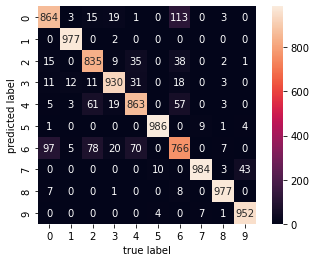

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_1=mymodel1.predict(X_test_model_cnn).round(2)
y_pred = np.argmax(pred_1, axis=-1)
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix.T, square=True, annot=True,fmt="d")
plt.xlabel('true label')
plt.ylabel('predicted label');

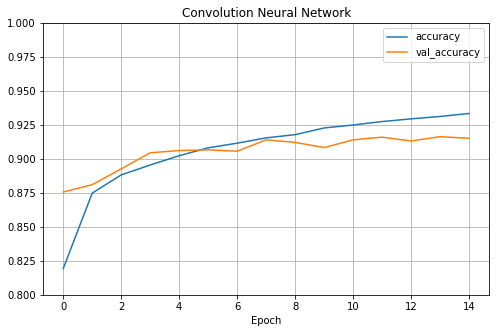

In [ ]:
cnn = pd.DataFrame(history1.history)[['accuracy', 'val_accuracy']]
cnn.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.title('Convolution Neural Network')
plt.show()